# CABS - Data Publication

In [1]:
# https://jupyter.pages.rwth-aachen.de/documentation/FAQ.html
#!pip install --user pandas

In this JupyterNotebook we publish all data we have gathered during the research
of the project *Continumm Analysis of Blood Samples*.

Below you will find all the results of the analysis, which were published in the paper,
but also the methods and algorithms we used.

For the whole data analysis we used these libraries.

In [2]:
import pandas as pd
from io import StringIO 

## Data sets
All data is shown below.

In [3]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html
cabs_data ='''
UUID	ID	patient_ID	patient_ID_Biobank	patient_date_of_record	patient_date_of_birth	patient_age	patient_sex	patient_ARDS	patient_days_of_fever	sample_ID_lab	sample_cell_count	sample_handling	sample_date_slot_A	sample_date_slot_B	sample_date_slot_C
3qqyk	1	166	UKP5021575246F	2020-05-04	1964-01-07	56	male	true	29	LV2002010621	2.25	Frozen	2020-05-04	2020-05-08	2020-05-14
vpdn6	2	167	UKP7531655608C	2020-02-01	1937-01-22	83	male	false		LV2002029589	2.10	Fresh	2020-05-11	2020-05-13	2020-05-20
8bfor	3	168	UKP4734173975D	2020-09-04	1945-04-02	75	female	false		LV2002042498	1.58	Frozen		2020-05-14	2020-05-20
jfzcu	4	169	UKP0744831512E	2020-08-15	1964-01-13	56	male	true	43	LV2002511086	2.98	Fresh	2020-08-18	2020-08-24	2020-08-31
w3tcl	5	170	UKP3746829544V	2020-05-02	1992-05-02	28	male	true		LV2002051688	2.00	Froen	2020-08-21	2020-08-26	2020-09-02
jpnlw	6	171	UKP742105612D9	2020-09-06	1966-12-17	54		false	13	LV2002514028	2.33	Frozen	2020-09-07	2020-09-14	2020-09-23
biz5a	7	172	UKP65337288310	2020-09-23	1976-02-05	44	male	false		LV2002513827		Fresh	2020-09-24		2020-09-29
ooh5h	8	173	UKP25476702710	2020-05-01	1949-06-01	71	male	false	11	LV2002515631	2.70	Frozen	2020-09-18		
mk12i	9	174	UKP1284651396F	2020-09-27	1940-08-09	80	male	false	10	LV2002515278	1.43	Frozen	2020-09-28	2020-10-05	2020-10-12
f9pzb	10	175	UKP06046254078	2020-10-10	1964-06-01	56	female	true	8	LV2002515818	2.18	Frozen	2020-10-12	2020-10-16	2020-10-23
yl8ym	11	176	UKP3406107799F	2020-06-21	1973-06-25	47	male	true	34	LV2002518518	3.10	Frozen		2020-10-26	2020-11-02
6dqld	12	177	UKP253722024B9	2020-10-21	1937-10-01	83	male	false	5	LV2002514298	1.95	Frozen	2020-10-23	2020-10-27	2020-11-03
guvbx	13	178	UKP753968652DB	2020-05-04	1996-12-04	24	female	true	9	LV2002512694	1.40	Frozen	2020-10-26		
7ul1o	14	179	UKP2527316861B	2020-10-24	1953-01-15	67		true	22	LV2002515817	1.55	Frozen	2020-10-26	2020-10-30	2020-11-06
6vh0b	15	180	UKP219245104BE	2020-10-23	1944-05-16	76	male	true	11	LV2002515839	3.93	Frozen	2020-10-26	2020-10-30	2020-11-06
5cazn	16	181	UKP125283874C9	2020-08-02	1958-02-01	62	male	true		LV2002524576	4.90	Frozen	2020-10-27		2020-11-09
7lljq	17	182	UKP1616518832D	2020-10-28	1970-12-07	50	male	true	11	LV2002525650	1.40	Frozen	2020-10-29	2020-11-03	
tisd7	18	183	UKP78152624745	2020-09-28	1951-04-05	69		true		LV2002575948	2.70	Frozen		2020-11-03	2020-11-09
ppmn4	19	184	UKP468484497FE	2020-10-08	1969-10-12	51	male	true		LV2002515775	2.05	Fresh	2020-10-29	2020-11-03	2020-11-09
8dwba	20	185	UKP593262851D3	2020-11-29	1969-11-17	51	female	false		LV2002516928	0.78	Frozen	2020-10-30	2020-11-04	2020-11-10
'''

We also give an overview of the columns used. But since there won’t be any calculations with the meta information we paste it as a plain table.

| Field                  | Original fieldname | description                                                               | category | controlled vocabulary | values            | origin                                                      |
|------------------------|--------------------|---------------------------------------------------------------------------|----------|-----------------------|-------------------|-------------------------------------------------------------|
| UUID                   |                    | a computer generated code (length of 5) for identifying a data set        | all      | false                 | alphanumeric      | externally generated (e.g. https://www.random.org/strings/) |
| ID                     | FACS Sample ID     | id for handling the samples, human readable                               | all      | false                 | integer           | Laboratory of the CABS-Group                                |
| patient_ID             | Pat-ID             | ID of patient in the system of the Biobank                                | patient  | false                 | integer           | Biobank                                                     |
| patient_ID_Biobank     | Biobank-ID (UKP)   | ID for the database of the Biobank                                        | patient  | false                 | alphanumeric (15) | Biobank                                                     |
| patient_date_of_record | Aufnahme           | Date when patient has been enrolled in study                              | patient  | false                 | date (YYYY-MM-DD) | Laboratory of the CABS-Group                                |
| patient_date_of_birth  | Geburtstag         | Date of birth of patient                                                  | patient  | false                 | date (YYYY-MM-DD) | Biobank                                                     |
| patient_age            | Alter              | Age of patient in years                                                   | patient  | false                 | integer           | Biobank                                                     |
| patient_sex            | Geschlecht         | Sex of patient                                                            | patient  | true                  | male, female      | Biobank                                                     |
| patient_ARDS           | Group              | Check whether patient had Acute Respiratory Distress Syndrome (ARDS)      | patient  | true                  | true, false       | Laboratory of the CABS-Group                                |
| patient_days_of_fever  | FeverDays          | Amount of days patient had fever when enrolled in study                   | patient  | false                 | integer           | Laboratory of the CABS-Group                                |
| sample_ID_lab          | Lab-ID             | ID of sample                                                              | sample   | false                 | alphanumeric      | Laboratory of the CABS-Group                                |
| sample_cell_count      | Zellzahl           | Amount of cells in one sample (value times 10^6)                          | sample   | false                 | float             | Laboratory of the CABS-Group                                |
| sample_handling        | Sample handling    | Condition of sample when arrived in laboratory                            | sample   | true                  | Fresh, Frozen     | Laboratory of the CABS-Group                                |
| sample_date_slot_A     | Tag 1              | Date when blood sample has been taken from patient, day 1                 | sample   | false                 | date (YYYY-MM-DD) | Laboratory of the CABS-Group                                |
| sample_date_slot_B     | Tag 5-7            | Date when blood sample has been taken from patient, between day 5 and 7   | sample   | false                 | date (YYYY-MM-DD) | Laboratory of the CABS-Group                                |
| sample_date_slot_C     | Tag 12-14          | Date when blood sample has been taken from patient, between day 12 and 14 | sample   | false                 | date (YYYY-MM-DD) | Laboratory of the CABS-Group                                |

As a first step we import the data set and store it as the variable `df`.
There are certain adjustments to do parsing the data correctly.

In [4]:
cabs = pd.read_csv(# using pandas reading the data
    StringIO(cabs_data), # referring to the data set by using the StringIO-method
    sep="\t", # defining the separator of columns which is a tab (default: ,)
    parse_dates=[4,5,13,14,15], # specifying columns with dates
)

Getting some first meta information about the data in general.
With this overview, generated with `cabs.info()` you can doube check whether the data has been read correctly.

In [5]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UUID                    20 non-null     object        
 1   ID                      20 non-null     int64         
 2   patient_ID              20 non-null     int64         
 3   patient_ID_Biobank      20 non-null     object        
 4   patient_date_of_record  20 non-null     datetime64[ns]
 5   patient_date_of_birth   20 non-null     datetime64[ns]
 6   patient_age             20 non-null     int64         
 7   patient_sex             17 non-null     object        
 8   patient_ARDS            20 non-null     bool          
 9   patient_days_of_fever   12 non-null     float64       
 10  sample_ID_lab           20 non-null     object        
 11  sample_cell_count       19 non-null     float64       
 12  sample_handling         20 non-null     object      

## Data viewing

Finally looking at the data itself and focusing on the first five rows.
This is to check whether the parsing of dates, booleans, strings etc. has been done correctly.

In [6]:
cabs.head()

UUID  ID  patient_ID patient_ID_Biobank patient_date_of_record  \
0  3qqyk   1         166     UKP5021575246F             2020-05-04   
1  vpdn6   2         167     UKP7531655608C             2020-02-01   
2  8bfor   3         168     UKP4734173975D             2020-09-04   
3  jfzcu   4         169     UKP0744831512E             2020-08-15   
4  w3tcl   5         170     UKP3746829544V             2020-05-02   

  patient_date_of_birth  patient_age patient_sex  patient_ARDS  \
0            1964-01-07           56        male          True   
1            1937-01-22           83        male         False   
2            1945-04-02           75      female         False   
3            1964-01-13           56        male          True   
4            1992-05-02           28        male          True   

   patient_days_of_fever sample_ID_lab  sample_cell_count sample_handling  \
0                   29.0  LV2002010621               2.25          Frozen   
1                    NaN  LV2002029589               2.10           Fresh   
2                    NaN  LV2002042498               1.58          Frozen   
3                   43.0  LV2002511086               2.98           Fresh   
4                    NaN  LV2002051688               2.00           Froen   

  sample_date_slot_A sample_date_slot_B sample_date_slot_C  
0         2020-05-04         2020-05-08         2020-05-14  
1         2020-05-11         2020-05-13         2020-05-20  
2                NaT         2020-05-14         2020-05-20  
3         2020-08-18         2020-08-24         2020-08-31  
4         2020-08-21         2020-08-26         2020-09-02

In the study we focus mainly on certain information, like age of patient, sex, amount of days of fever, day of the first blood sample.

In [7]:
cabs[["UUID",'patient_date_of_birth','patient_sex','patient_days_of_fever',"sample_date_slot_A"]]

UUID patient_date_of_birth patient_sex  patient_days_of_fever  \
0   3qqyk            1964-01-07        male                   29.0   
1   vpdn6            1937-01-22        male                    NaN   
2   8bfor            1945-04-02      female                    NaN   
3   jfzcu            1964-01-13        male                   43.0   
4   w3tcl            1992-05-02        male                    NaN   
5   jpnlw            1966-12-17         NaN                   13.0   
6   biz5a            1976-02-05        male                    NaN   
7   ooh5h            1949-06-01        male                   11.0   
8   mk12i            1940-08-09        male                   10.0   
9   f9pzb            1964-06-01      female                    8.0   
10  yl8ym            1973-06-25        male                   34.0   
11  6dqld            1937-10-01        male                    5.0   
12  guvbx            1996-12-04      female                    9.0   
13  7ul1o            1953-01-15         NaN                   22.0   
14  6vh0b            1944-05-16        male                   11.0   
15  5cazn            1958-02-01        male                    NaN   
16  7lljq            1970-12-07        male                   11.0   
17  tisd7            1951-04-05         NaN                    NaN   
18  ppmn4            1969-10-12        male                    NaN   
19  8dwba            1969-11-17      female                    NaN   

   sample_date_slot_A  
0          2020-05-04  
1          2020-05-11  
2                 NaT  
3          2020-08-18  
4          2020-08-21  
5          2020-09-07  
6          2020-09-24  
7          2020-09-18  
8          2020-09-28  
9          2020-10-12  
10                NaT  
11         2020-10-23  
12         2020-10-26  
13         2020-10-26  
14         2020-10-26  
15         2020-10-27  
16         2020-10-29  
17                NaT  
18         2020-10-29  
19         2020-10-30

## Data calculations

### Average

On page 9 in the paper we discuss the average days of fever the patients had during the study.
This is how we got the result.

In [8]:
int(cabs['patient_days_of_fever'].mean())

17

Same goes for the average age of all patients we discuss in the conclusion.

In [9]:
int(cabs.patient_age.mean())

59

### Age of patients

Of special interest were the blood samples (timeslot A) which were taken in September 2020.
In the article we showed the calculated age of the patients when they had taken blood for the first time.

This is how we extracted the samples and the patients.

In [10]:
timeslot = (cabs["sample_date_slot_A"] > "2020-09-01") & (cabs["sample_date_slot_A"] < "2020-10-01")
cabs.loc[timeslot]

UUID  ID  patient_ID patient_ID_Biobank patient_date_of_record  \
5  jpnlw   6         171     UKP742105612D9             2020-09-06   
6  biz5a   7         172     UKP65337288310             2020-09-23   
7  ooh5h   8         173     UKP25476702710             2020-05-01   
8  mk12i   9         174     UKP1284651396F             2020-09-27   

  patient_date_of_birth  patient_age patient_sex  patient_ARDS  \
5            1966-12-17           54         NaN         False   
6            1976-02-05           44        male         False   
7            1949-06-01           71        male         False   
8            1940-08-09           80        male         False   

   patient_days_of_fever sample_ID_lab  sample_cell_count sample_handling  \
5                   13.0  LV2002514028               2.33          Frozen   
6                    NaN  LV2002513827                NaN           Fresh   
7                   11.0  LV2002515631               2.70          Frozen   
8                   10.0  LV2002515278               1.43          Frozen   

  sample_date_slot_A sample_date_slot_B sample_date_slot_C  
5         2020-09-07         2020-09-14         2020-09-23  
6         2020-09-24                NaT         2020-09-29  
7         2020-09-18                NaT                NaT  
8         2020-09-28         2020-10-05         2020-10-12

And now focusing on only the patient and the two days we want to calculate their gap from.

In [11]:
cabs.loc[timeslot,["patient_ID","patient_date_of_birth","sample_date_slot_A"]]

patient_ID patient_date_of_birth sample_date_slot_A
5         171            1966-12-17         2020-09-07
6         172            1976-02-05         2020-09-24
7         173            1949-06-01         2020-09-18
8         174            1940-08-09         2020-09-28

In [12]:
cabs['patient_age_slot_A'] = (cabs['sample_date_slot_A'] - cabs['patient_date_of_birth']).dt.days
cabs.loc[timeslot,["patient_ID","patient_date_of_birth","sample_date_slot_A",'patient_age_slot_A']].sort_values(by=['patient_age_slot_A'])

patient_ID patient_date_of_birth sample_date_slot_A  patient_age_slot_A
6         172            1976-02-05         2020-09-24             16303.0
5         171            1966-12-17         2020-09-07             19623.0
7         173            1949-06-01         2020-09-18             26042.0
8         174            1940-08-09         2020-09-28             29270.0

This is how we got the oldest and youngest patient from September when he/she got taken blood for the first time.

### Data control

In the paper we mention that there were some difficulties since not all blood samples were taken 
within the specific date range.
In the columns `sample_date_slot_A/B/C` you see the dates.
The interval is important and should be within a certain date range:

* `sample_date_slot_A` is from day one.
* `sample_date_slot_B` should be after five to seven days later.
* `sample_date_slot_C` after twelve to fourteen days after first blood sample or five to seven days after second.

The problematic samples are highlighted and we have treated them accordingly.

In [13]:
cabs['A_B'] = (cabs['sample_date_slot_B'] - cabs['sample_date_slot_A']).dt.days
cabs['B_C'] = (cabs['sample_date_slot_C'] - cabs['sample_date_slot_B']).dt.days
cabs['A_C'] = (cabs['sample_date_slot_C'] - cabs['sample_date_slot_A']).dt.days

                                        
def highlight_max(x):
    return ['' if 5  <= v <= 7     else 'background-color: red'
            '' if 12 >= v <= 14  else ''
            for v in x]


cabs[['patient_ID',
       'sample_date_slot_A',
       'sample_date_slot_B',
       'sample_date_slot_C',
       'A_B',
       'B_C',
      'A_C']].style.apply(highlight_max, 
                           subset=pd.IndexSlice[:, ['A_B', 'B_C','A_C']],
                          ).highlight_null("yellow")


## Data visualization

## Plot of patients and sex

In the study we stress the distribution of sex in relation to certain age groups.
We divided the patients into three groups based on their age
20-50; 50-65; 65-90. Each patient is counted to one of these groups.

In [14]:
age_groups = pd.cut(cabs['patient_age'], bins=[20, 50, 65, 90])
age_groups

0     (50, 65]
1     (65, 90]
2     (65, 90]
3     (50, 65]
4     (20, 50]
5     (50, 65]
6     (20, 50]
7     (65, 90]
8     (65, 90]
9     (50, 65]
10    (20, 50]
11    (65, 90]
12    (20, 50]
13    (65, 90]
14    (65, 90]
15    (50, 65]
16    (20, 50]
17    (65, 90]
18    (50, 65]
19    (50, 65]
Name: patient_age, dtype: category
Categories (3, interval[int64]): [(20, 50] < (50, 65] < (65, 90]]

Second we combine the age groups with the information about the individual sex.

In [15]:
sex_age = pd.crosstab(age_groups, cabs['patient_sex'])
sex_age

patient_sex  female  male
patient_age              
(20, 50]          1     4
(50, 65]          2     4
(65, 90]          1     5

And finally we plot the data. This is figure 2 in the article.

<AxesSubplot:xlabel='patient_age'>

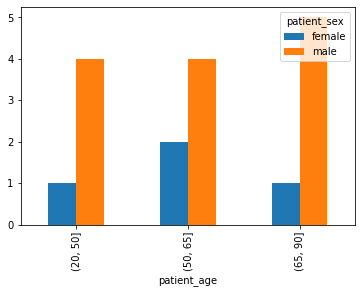

In [16]:
sex_age.plot(kind='bar',stacked=False)

<AxesSubplot:>

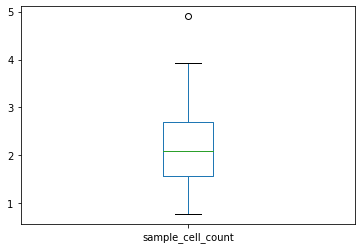

In [17]:
#import matplotlib.pyplot as plt
cabs.boxplot(column=['sample_cell_count'], return_type='axes', grid = False)


<AxesSubplot:>

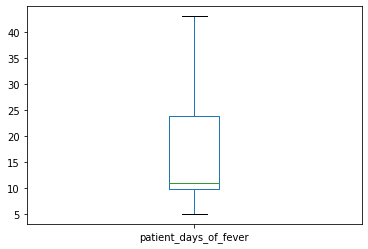

In [18]:
cabs.boxplot(column=['patient_days_of_fever'], return_type='axes', grid = False)

## Data search

Imagine you only have the patient’s ID and you would like to get all the other information.

In [19]:
patient_uuid ="jpnlw"

In [20]:
patient_search = cabs.loc[cabs['UUID'] == patient_uuid ]
patient_search[['sample_date_slot_A','sample_date_slot_B','sample_date_slot_C']]

sample_date_slot_A sample_date_slot_B sample_date_slot_C
5         2020-09-07         2020-09-14         2020-09-23